### Importing Libraries

In [4]:
import numpy as np
import tensorflow as tf
import cv2
from google.cloud import storage
import io
from PIL import Image
import sys, os, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(2,parentdir) 
from model.image_utils import *
sys.path.append('model')
import image_utils

### Obtaining the data

In [7]:
path = '../Datasets/train_32X32.mat'
svhnx,svhny = get_svhn_xy(path) # 

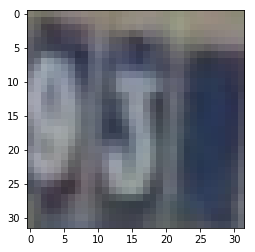

In [8]:
show_1(svhnx[7])

In [9]:
imgs1 = taking_labels(svhnx,svhny,3) # We select labels to make a subset of the images. 

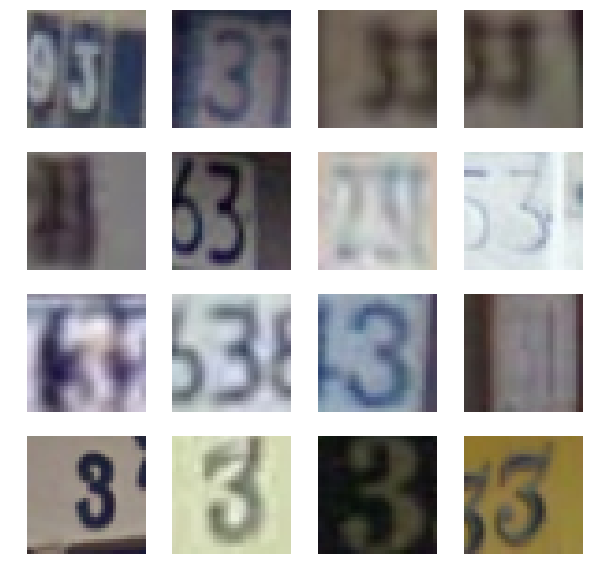

In [10]:
# Lets see our images
ImageCollector.show(None,imgs1)

In [11]:
images = resize_normal_svhn(imgs1) # We will resize them to have a 64X64 size and then normalize the data

In [12]:
## Add noise
images_wnoise = add_noise(images, 1, 5)

In [13]:
# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
% load_ext autoreload
% autoreload 2
#train the model - generator and discriminator 
from model.dcgan import DCGAN

tf.reset_default_graph()
dcgan = DCGAN(batch_size=64,
              z_dim=100,
              model_name='DCGAN',
              data_source='SVHN',
              z_dist='norm')
dcgan.train(images_wnoise, learning_rate=0.0001, iters=3100)

conv_0_(64, 4, 4, 512)
conv_0_norm_(64, 4, 4, 512)
conv_0_relu_(64, 4, 4, 512)
conv_1_(64, 8, 8, 256)
conv_1_norm_(64, 8, 8, 256)
conv_1_relu_(64, 8, 8, 256)
conv_2_(64, 16, 16, 128)
conv_2_norm_(64, 16, 16, 128)
conv_2_relu_(64, 16, 16, 128)
conv_3_(64, 32, 32, 64)
conv_3_norm_(64, 32, 32, 64)
conv_3_relu_(64, 32, 32, 64)
conv_4_(64, 64, 64, 3)
(64, 64, 64, 3)
(64, 64, 64, 3)
Building my DCGAN
X_train size 8497
new size 8497


KeyboardInterrupt: 

In [71]:
# show the graph
from model.cnn_jupyter_tensorboard import show_graph 
tf.reset_default_graph()
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('SVHN/checkpoints/DCGAN.ckpt.meta')
    graph = tf.get_default_graph()
    show_graph(graph)

In [261]:
mypath = 'SVHN/results_1'

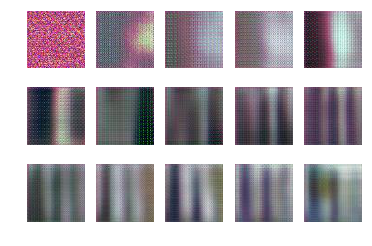

In [269]:
pretty_viz(mypath,'svhn1',mypath) # Visualize the iterations.